In [7]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import precision_recall_fscore_support, make_scorer, recall_score, f1_score, confusion_matrix, precision_score, balanced_accuracy_score
from sklearn.metrics import fbeta_score, classification_report


from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from libs.print_cm import print_cm
from libs.loader import load_jobchange

         

from sklearn.model_selection import learning_curve, validation_curve

In [4]:
# #Using Dataset for Data Scientist Job Change binary classification: 
# # https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists?select=aug_train.csv
# df = pd.read_csv("data/job_change_data_scientist.csv")
# df_enc_0 = df.apply(LabelEncoder().fit_transform)
# df_enc = df_enc_0.drop(columns=["enrollee_id","target"])
# minMaxNorm = MinMaxScaler()
# df_norm = minMaxNorm.fit_transform(df_enc)

# X = df_norm
# y = df_enc_0["target"]
X, y = load_jobchange()


In [15]:
dt = DecisionTreeClassifier(random_state=0)

# scorer = make_scorer(precision_score, pos_label=1 )
# scorer = make_scorer(recall_score, pos_label=0)
# scorer = make_scorer(recall_score,average='weighted')
# scorer = make_scorer(f1_score, average='weighted' )
scorer = make_scorer(f1_score)


cv_target = cross_validate(dt, X, y, cv=3, scoring=scorer)
cv_target

{'fit_time': array([0.04061103, 0.03459287, 0.03695703]),
 'score_time': array([0.00355601, 0.00345802, 0.00264978]),
 'test_score': array([0.44095157, 0.45076226, 0.44994017])}

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y,random_state=0)
dt.fit(X_train,y_train)
pass

In [18]:
def stats_pac( label, estimator, X_data, y_data ):
    predicted = estimator.predict(X_data)
    print ('****** %s ******' % label)
    cm = confusion_matrix(y_data, predicted)
    print ('Confusion matrix')
    print_cm(cm, labels=['0','1'])
    
    print ('Recall - label 0: %0.4f'% recall_score(y_data, predicted, pos_label=0))
    print ('Recall - label 1: %0.4f'% recall_score(y_data, predicted))

    print ('Precsion - label 0: %0.4f'% precision_score(y_data, predicted, pos_label=0))
    print ('Precsion - label 1: %0.4f'% precision_score(y_data, predicted))
    
    sample_wt = [ 3 if i == 1 else 1 for i in predicted]
    print ('F1 Score macro: %0.4f'% f1_score(y_data, predicted, average='macro', sample_weight=sample_wt ))
    print ('F1 Score - label 0 : %0.4f'% f1_score(y_data, predicted, pos_label=0 ))
    print ('F1 Score - label 1 : %0.4f'% f1_score(y_data, predicted, pos_label=1 ))
    print ('F1 Score - weighted avg : %0.4f'% f1_score(y_data, predicted, average='weighted' ))
    print ('F1 Beta - b=2 weighted avg : %0.4f'% fbeta_score(y_data,predicted, average='weighted', beta=2))
    
    print (classification_report(y_data, predicted, labels=[1,0]))


stats_pac('Knn plain - Train', dt, X_train, y_train)
stats_pac('Knn plain - Validation', dt, X_test, y_test)

****** Knn plain - Train ******
Confusion matrix
              0     1 
        0  8628     0 
        1     9  2857 
Recall - label 0: 1.0000
Recall - label 1: 0.9969
Precsion - label 0: 0.9990
Precsion - label 1: 1.0000
F1 Score macro: 0.9995
F1 Score - label 0 : 0.9995
F1 Score - label 1 : 0.9984
F1 Score - weighted avg : 0.9992
F1 Beta - b=2 weighted avg : 0.9992
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2866
           0       1.00      1.00      1.00      8628

    accuracy                           1.00     11494
   macro avg       1.00      1.00      1.00     11494
weighted avg       1.00      1.00      1.00     11494

****** Knn plain - Validation ******
Confusion matrix
              0     1 
        0  1707   450 
        1   387   330 
Recall - label 0: 0.7914
Recall - label 1: 0.4603
Precsion - label 0: 0.8152
Precsion - label 1: 0.4231
F1 Score macro: 0.5977
F1 Score - label 0 : 0.8031
F1 Score - label 1 : 0.44

## Hyperparams

In [20]:
range_list = np.linspace(1,25,25)

In [26]:
dt2 = DecisionTreeClassifier(random_state=0)
strat_cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

dt_train_scores,dt_test_scores = validation_curve(
        dt2, X, y, param_name='max_depth', param_range=range_list,
        scoring=scorer, cv=strat_cv, n_jobs=-1)

In [27]:
train_scores_mean = np.mean(dt_train_scores, axis=1)
test_scores_mean = np.mean(dt_test_scores, axis=1)
print (len(range_list),train_scores_mean.shape,test_scores_mean.shape)
df_1 = pd.DataFrame({'x':range_list,'train':train_scores_mean,'test':test_scores_mean} )
print(df_1)

25 (25,) (25,)
       x     train      test
0    1.0  0.492364  0.492160
1    2.0  0.492750  0.492054
2    3.0  0.493219  0.491886
3    4.0  0.548991  0.542587
4    5.0  0.580302  0.565461
5    6.0  0.599262  0.571156
6    7.0  0.617685  0.575641
7    8.0  0.643589  0.586312
8    9.0  0.664331  0.585254
9   10.0  0.679727  0.567097
10  11.0  0.706002  0.565788
11  12.0  0.728784  0.546177
12  13.0  0.757777  0.535858
13  14.0  0.784153  0.520378
14  15.0  0.811740  0.506544
15  16.0  0.837525  0.497386
16  17.0  0.862719  0.482179
17  18.0  0.886978  0.479335
18  19.0  0.907981  0.477035
19  20.0  0.925976  0.477796
20  21.0  0.940841  0.464809
21  22.0  0.952480  0.455590
22  23.0  0.962411  0.457621
23  24.0  0.970682  0.451949
24  25.0  0.977676  0.454547


Text(0.5, 1.0, 'Decsion Tree max_depth')

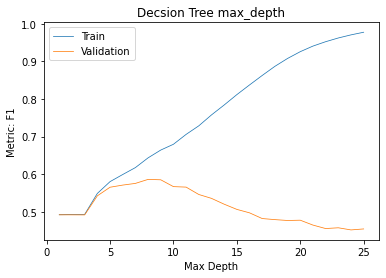

In [28]:
axs = plt.gca()
axs.plot(df_1['x'], df_1['train'], label='Train', linewidth=0.75)
axs.plot(df_1['x'], df_1['test'], label='Validation', linewidth=0.75)
axs.legend(); axs.set_ylabel("Metric: F1"); axs.set_xlabel("Max Depth")
axs.set_title('Decsion Tree max_depth')

In [5]:
#{'max_depth':6,'min_samples_leaf':220}
dt_to_plot = DecisionTreeClassifier(max_depth=6, min_samples_leaf=220, random_state=0)
dt_to_plot.fit(X,y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=220, random_state=0)

[Text(732.375, 1467.72, 'X[1] <= 14.5\ngini = 0.374\nsamples = 14368\nvalue = [10785, 3583]'),
 Text(348.75, 1141.56, 'X[6] <= 5.5\ngini = 0.485\nsamples = 2583\nvalue = [1065, 1518]'),
 Text(279.0, 815.4000000000001, 'X[11] <= 86.5\ngini = 0.482\nsamples = 2252\nvalue = [912, 1340]'),
 Text(139.5, 489.24, 'X[8] <= 4.5\ngini = 0.477\nsamples = 1691\nvalue = [666, 1025]'),
 Text(69.75, 163.08000000000015, '\n  (...)  \n'),
 Text(209.25, 163.08000000000015, '\n  (...)  \n'),
 Text(418.5, 489.24, 'X[8] <= 3.5\ngini = 0.492\nsamples = 561\nvalue = [246, 315]'),
 Text(348.75, 163.08000000000015, '\n  (...)  \n'),
 Text(488.25, 163.08000000000015, '\n  (...)  \n'),
 Text(418.5, 815.4000000000001, 'gini = 0.497\nsamples = 331\nvalue = [153, 178]'),
 Text(1116.0, 1141.56, 'X[8] <= 7.5\ngini = 0.289\nsamples = 11785\nvalue = [9720, 2065]'),
 Text(837.0, 815.4000000000001, 'X[1] <= 52.5\ngini = 0.171\nsamples = 8227\nvalue = [7449, 778]'),
 Text(697.5, 489.24, 'X[11] <= 23.5\ngini = 0.249\nsampl

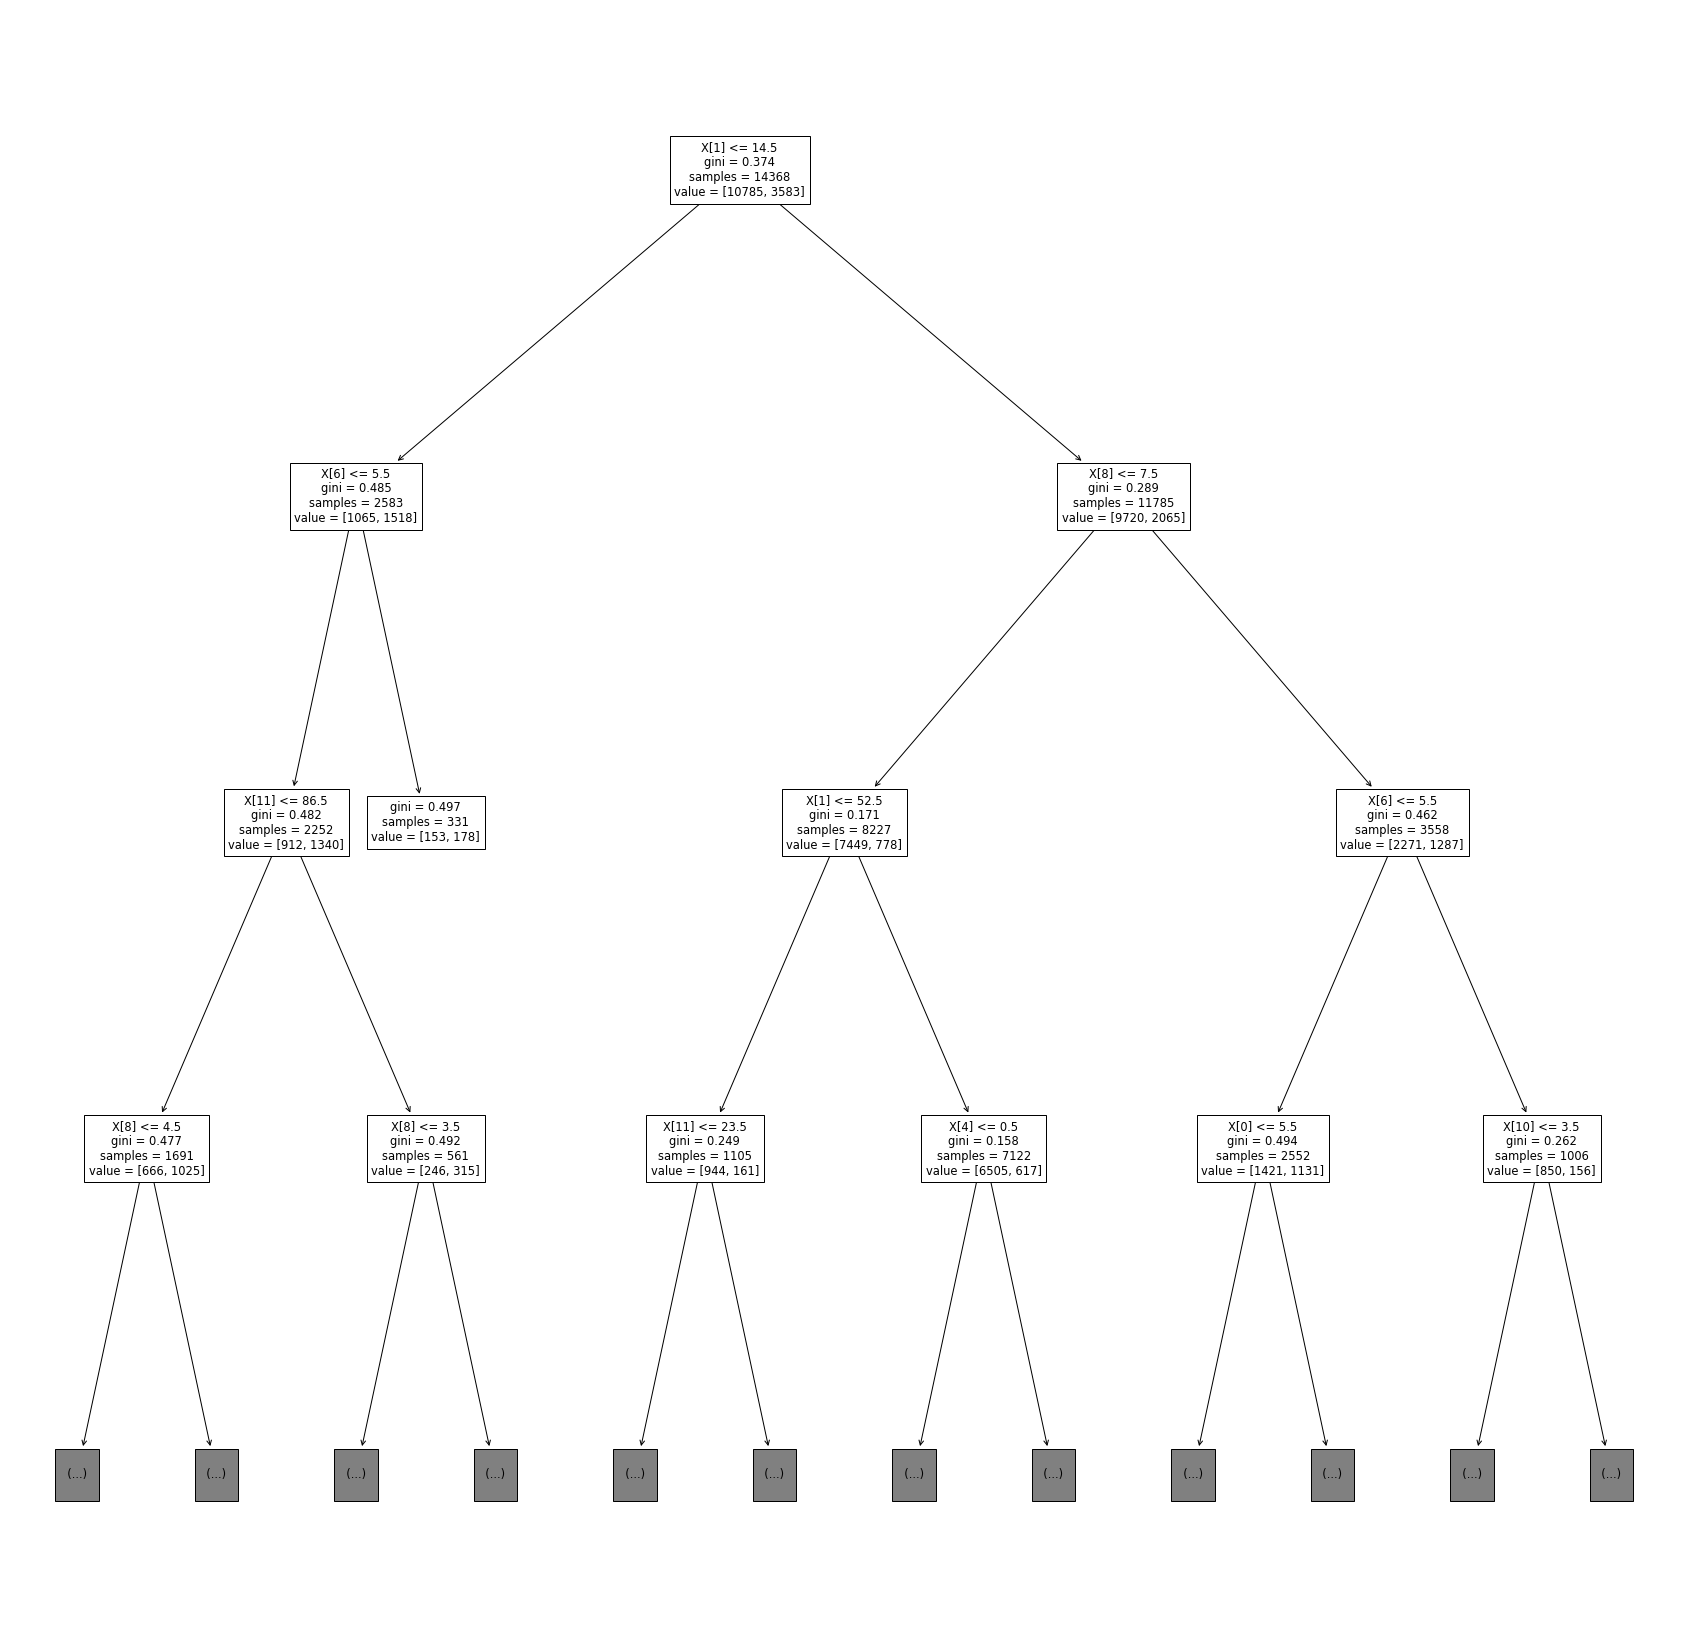

In [8]:
fig = plt.figure(figsize=[30,30])
axs1 = fig.add_subplot(111)
plot_tree(dt_to_plot, max_depth=3, ax=axs1)